In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

!pip install mglearn
import mglearn

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     |████████████████████████████████| 540 kB 294 kB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=1d1c44d2191992df96d88d0ad044e525878f5e04f5840980d0af86c7f975054c
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn
/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


# **DATASET DE ENTRENAMIENTO**

80 ENTRADAS - CARACTERISTICAS

1 SALIDA - SalePrice

1460 DATOS

38 CARACTERISTICAS DE TIPO NUMERICO (CONTINUO)

43 CARACTERISTICAS DE TIPO CATEFORICO (DISCRETO)

In [ ]:
train_data = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train_data.info()              #VERIFICAMOS LA INFORMACION DE LAS CARACTERISTICAS COMO: TIPO DE DATO Y DATOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Verificando los datos, se escogen las caracteristicas que no presenten datos faltantes, donde el nuevo dataset se reduce a 41 caracteristicas (Features).

In [ ]:
#DATOS DE ENTRADA - FEATURES
features = train_data.loc[:, ['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea', 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','Street','LotShape','LandContour','LotConfig','LandSlope',   'Neighborhood','Condition1','BldgType','RoofStyle','ExterQual','ExterCond','Foundation','HeatingQC','CentralAir','PavedDrive','SaleCondition']]
print('Features: ', features.shape)

#SALIDA - SalePrice - Target
Target = train_data.loc[:, ['SalePrice']]
print('Target: ', Target.shape)

Features:  (1460, 41)
Target:  (1460, 1)


Con el nuevo dataset, se procede a realizar el proceso de convertir las carecteristicas de tipo discreto a continuo, por medio de 'get_dummies'.

El nuevos dataset tendra ahora 119 caracteristicas (features)

In [ ]:
print('original','\n', list(features),'\n')
features_dummies = pd.get_dummies(features)
print('con dummies', '\n', list(features_dummies), '\n')

print('Features: ', features.shape)
print('Features dummies: ', features_dummies.shape)

original 
 ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'HeatingQC', 'CentralAir', 'PavedDrive', 'SaleCondition'] 

con dummies 
 ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3

In [ ]:
features_dummies.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,856,854,0,1710,...,1,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,1262,0,0,1262,...,1,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,920,866,0,1786,...,1,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,961,756,0,1717,...,1,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,1145,1053,0,2198,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
features_dummies.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,1162.626712,346.992466,5.844521,1515.463699,...,0.934932,0.061644,0.020548,0.917808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,386.587738,436.528436,48.623081,525.480383,...,0.246731,0.240590,0.141914,0.274751,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,882.000000,0.000000,0.000000,1129.500000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,1087.000000,0.000000,0.000000,1464.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,1391.250000,728.000000,0.000000,1776.750000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,4692.000000,2065.000000,572.000000,5642.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **SEPARACION DE LOS DATOS**

Separamos el dataset en dataset de entrenamiento y dataset de validacion para el entrenamiento y validacion de los modelos a trabajar

In [ ]:
# 80% DE LOS DATOS PARA ENTRENAMIENTO Y 20% DE LOS DATOS PARA VALIDACION
X = features_dummies
Y = Target
x_train, x_val, y_train, y_val = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)
print('X_train: ', x_train.shape)
print('Y_train: ', y_train.shape, '\n')

print('X_val: ', x_val.shape)
print('Y_val: ', y_val.shape)

X_train:  (1168, 119)
Y_train:  (1168, 1) 

X_val:  (292, 119)
Y_val:  (292, 1)


# **APLICAMOS ESCALONAMIENTO A LAS CARACTERISTICAS**

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

print(x_train_scaled.min(axis=0))
print(x_train_scaled.max(axis=0))

print(x_val_scaled.min(axis=0))
print(x_val_scaled.max(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 0.          0.00138353  0.         -0.14285714  0.05797101  0.
  0.03419     0.          0.          0.05105501  0.          0.
  0.          0.5         0.08333333  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          

# **MODELO: KNN REGRESSOR**

Utilizaremos el modelo de regresion de KNN.

Usaremos un ciclo for para analizar como es el comportamiento de los desempeños con los datos de entrenamiento y los datos de validacion.
Por lo general se empieza con un K = 50% de los datos que en este caso seria 584, pero al hacerlo se vuelve lento el procesamiento. Por lo tanto empezaremos con un K = 100.

**DATOS SIN ESCALAR**

In [ ]:
training_accuracy = []                    #Lista para guardar los datos de la precision con los datos de entrenamiento
val_accuracy = []                         #Lista para guardar los datos de la precision con los datos de validacion

valor_K =range(100 , 0, -1)                     #Creamos un vector descendente que contiene va de K=100 a k=1

for i in valor_K:                                                      #Ciclo FOR para realizar el entrenamiento y validacion desde K=100 hasta K=1
    reg_knn = KNeighborsRegressor(i)                                   #Creamos un objeto que contiene al modelo de regreseion KNN
    reg_knn.fit(x_train, y_train)                                      #Entrenamos el modelo con los datos de entrenamiento
    training_accuracy.append(reg_knn.score(x_train, y_train))          #Medimos y guardamos el desempeño del modelo con los datos de entrenamiento
    val_accuracy.append(reg_knn.score(x_val, y_val))                   #Medimos y guardamos el desempeño del modelo con los datos de validacion

# GRAFICAMOS LOS DESEMPEÑOS OBTENIDOS VS LOS VALORES DE K
plt.figure(figsize=(20, 10))
plt.plot(valor_K, training_accuracy, label="training accuracy")
plt.plot(valor_K, val_accuracy, label="val accuracy")
plt.title("ANALISIS DE COMPLEJIDAD")
plt.ylabel("Accuracy")
plt.xlabel("Valores K")
plt.xlim(100, 0)
plt.grid()
plt.legend()

In [ ]:
#CON UN K = 6 EL DESEMPEÑO ES EL MEJOR EN VALIDACION
reg_knn = KNeighborsRegressor(6)
reg_knn.fit(x_train, y_train)
print('Desempeño de entrenamiento: ', reg_knn.score(x_train, y_train))
print('Desempeño de validacion: ', reg_knn.score(x_val, y_val))

**RESULTADO**

Como se observa en la grafica, el modelo de regresion de KNN no es muy bueno. 

Con un desempeño de 68% en entrenamiento y un desempeño de 57% en validacion

**DATOS ESCALADOS**

In [ ]:
training_accuracy_scaled = []                    #Lista para guardar los datos de la precision con los datos de entrenamiento
val_accuracy_scaled = []                         #Lista para guardar los datos de la precision con los datos de validacion

valor_K =range(100 , 0, -1)                     #Creamos un vector descendente que contiene va de K=100 a k=1

for i in valor_K:                                                                   #Ciclo FOR para realizar el entrenamiento y validacion desde K=100 hasta K=1
    reg_knn_scaled = KNeighborsRegressor(i)                                          #Creamos un objeto que contiene al modelo de regreseion KNN
    reg_knn_scaled.fit(x_train_scaled, y_train)                                      #Entrenamos el modelo con los datos de entrenamiento
    training_accuracy_scaled.append(reg_knn_scaled.score(x_train_scaled, y_train))          #Medimos y guardamos el desempeño del modelo con los datos de entrenamiento
    val_accuracy_scaled.append(reg_knn_scaled.score(x_val_scaled, y_val))                   #Medimos y guardamos el desempeño del modelo con los datos de validacion

# GRAFICAMOS LOS DESEMPEÑOS OBTENIDOS VS LOS VALORES DE K
plt.figure(figsize=(20, 10))
plt.plot(valor_K, training_accuracy_scaled, label="training accuracy")
plt.plot(valor_K, val_accuracy_scaled, label="val accuracy")
plt.title("ANALISIS DE COMPLEJIDAD CON DATOS ESCALADOS")
plt.ylabel("Accuracy")
plt.xlabel("Valores K")
plt.xlim(100, 0)
plt.grid()
plt.legend()

In [ ]:
#CON UN K = 10 EL DESEMPEÑO ES EL MEJOR EN VALIDACION
reg_knn_scaled = KNeighborsRegressor(10)
reg_knn_scaled.fit(x_train_scaled, y_train)
print('Desempeño de entrenamiento: ', reg_knn_scaled.score(x_train_scaled, y_train))
print('Desempeño de validacion: ', reg_knn_scaled.score(x_val_scaled, y_val))

**RESULTADO**

Como se observa en la grafica, el modelo de regresion de KNN con datos escalados mejor que sin escalar. 

Con un desempeño de 73% en entrenamiento y un desempeño de 68% en validacion

# **MODELO: LINEAR REGRESSION**

**DATOS SIN ESCALAR**

In [ ]:
reg_linear_regressor = LinearRegression()
reg_linear_regressor.fit(x_train, y_train)
print('Desempeño de entrenamiento: ', reg_linear_regressor.score(x_train, y_train))
print('Desempeño de validacion: ', reg_linear_regressor.score(x_val, y_val))

Desempeño de entrenamiento:  0.8618656335063253
Desempeño de validacion:  0.7949280513259541


**RESULTADO**

Se observa que el modelo de regresion lineal da un mejor resultado que el modelo de regresion de KNN, con un desempeño de 86% en entrenamiento y un desempeño de 79% en validacion. Pero se presenta sobreentrenamiento en el modelo (overfitting).

**DATOS ESCALADOS**

In [ ]:
reg_linear_regressor_scaled = LinearRegression()
reg_linear_regressor_scaled.fit(x_train_scaled, y_train)
print('Desempeño de entrenamiento: ', reg_linear_regressor_scaled.score(x_train_scaled, y_train))
print('Desempeño de validacion: ', reg_linear_regressor_scaled.score(x_val_scaled, y_val))

Desempeño de entrenamiento:  0.8618630498412647
Desempeño de validacion:  -1.987717598585116e+19


# **MODELO RIDGE REGRESSION**

**DATOS SIN ESCALAR**

In [ ]:
reg_ridge = Ridge()      #El alpha por defecto es 1.0
reg_ridge.fit(x_train, y_train)
print('Desempeño de entrenamiento: ', reg_ridge.score(x_train, y_train))
print('Desempeño de validacion: ', reg_ridge.score(x_val, y_val))

Desempeño de entrenamiento:  0.8616143121134254
Desempeño de validacion:  0.7999526180762762


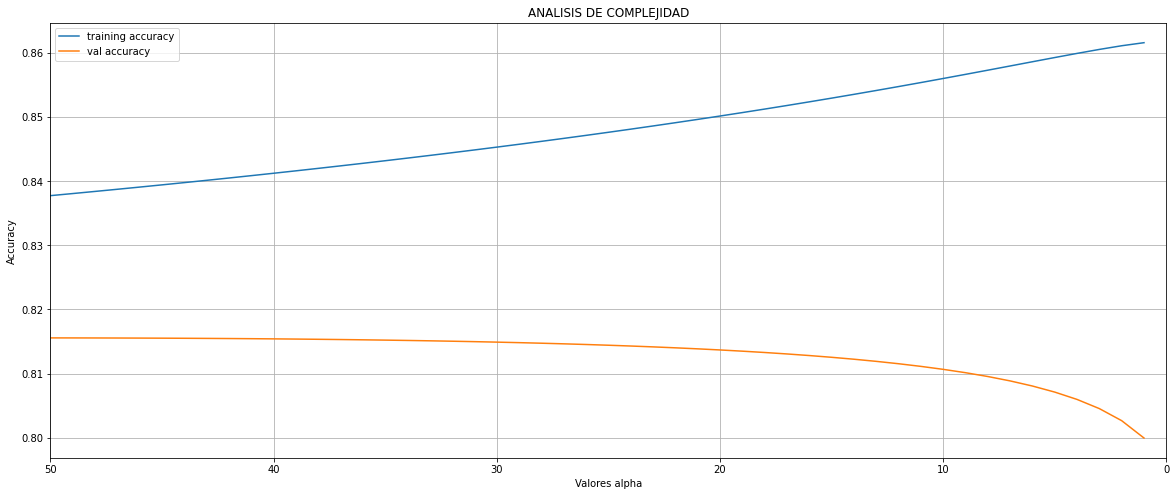

In [ ]:
training_accuracy2 = []                    #Lista para guardar los datos de la precision con los datos de entrenamiento
val_accuracy2 = []                         #Lista para guardar los datos de la precision con los datos de validacion

valor_alpha =range(50 , 0, -1)                     #Creamos un vector descendente que contiene va de alpha=50 a alpha=1

for i in valor_alpha:                                                      #Ciclo FOR para realizar el entrenamiento y validacion desde alpha=50 a alpha=1
    reg_ridge = Ridge(alpha=i)                                             #Creamos un objeto que contiene al modelo de regresion ridge
    reg_ridge.fit(x_train, y_train)                                        #Entrenamos el modelo con los datos de entrenamiento
    training_accuracy2.append(reg_ridge.score(x_train, y_train))           #Medimos y guardamos el desempeño del modelo con los datos de entrenamiento
    val_accuracy2.append(reg_ridge.score(x_val, y_val))                    #Medimos y guardamos el desempeño del modelo con los datos de validacion

# GRAFICAMOS LOS DESEMPEÑOS OBTENIDOS VS LOS VALORES DE ALPHA
plt.figure(figsize=(20, 8))
plt.plot(valor_alpha, training_accuracy2, label="training accuracy")
plt.plot(valor_alpha, val_accuracy2, label="val accuracy")
plt.title("ANALISIS DE COMPLEJIDAD")
plt.ylabel("Accuracy")
plt.xlabel("Valores alpha")
plt.xlim(50, 0)
plt.grid()
plt.legend()

In [ ]:
#CON UN ALPHA = 40 EL DESEMPEÑO ES EL MEJOR EN VALIDACION
reg_ridge = Ridge(alpha=40) 
reg_ridge.fit(x_train, y_train)
print('Desempeño de entrenamiento: ', reg_ridge.score(x_train, y_train))
print('Desempeño de validacion: ', reg_ridge.score(x_val, y_val))

Desempeño de entrenamiento:  0.8412477555791261
Desempeño de validacion:  0.8154189984233439


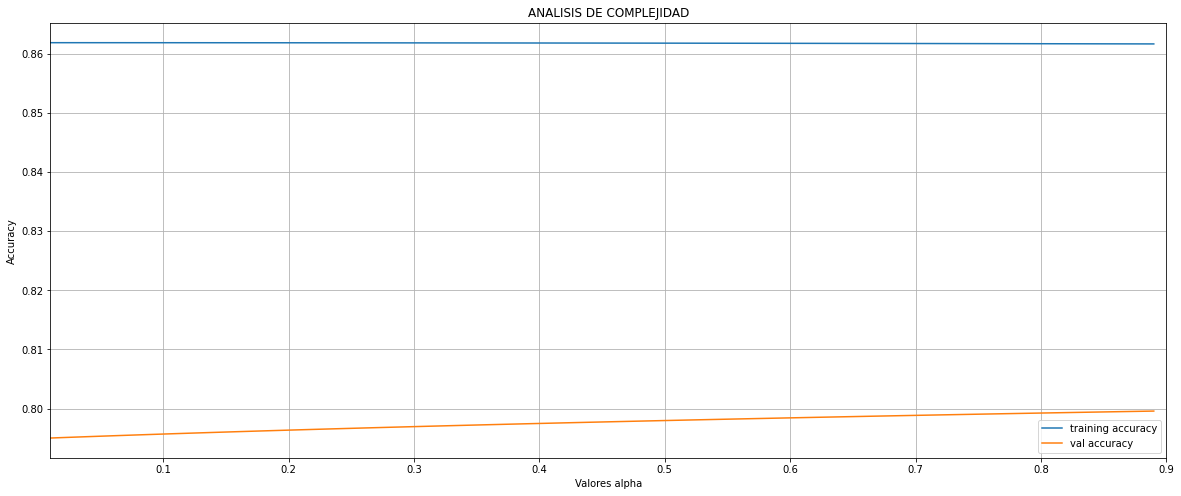

In [ ]:
training_accuracy3 = []                    #Lista para guardar los datos de la precision con los datos de entrenamiento
val_accuracy3 = []                         #Lista para guardar los datos de la precision con los datos de validacion

valor_alpha2 =np.arange(0.01, 0.9, 0.01)                    #Creamos un vector descendente que contiene va de K=100 a k=1

for i in valor_alpha2:                                                      #Ciclo FOR para realizar el entrenamiento y validacion desde K=50 hasta K=1
    reg_ridge = Ridge(alpha=i)                                           #Creamos un objeto que contiene al modelo de clasificacion KNN
    reg_ridge.fit(x_train, y_train)                                      #Entrenamos el modelo con los datos de entrenamiento
    training_accuracy3.append(reg_ridge.score(x_train, y_train))          #Medimos y guardamos el desempeño del modelo con los datos de entrenamiento
    val_accuracy3.append(reg_ridge.score(x_val, y_val))                   #Medimos y guardamos el desempeño del modelo con los datos de validacion

# GRAFICAMOS LOS DESEMPEÑOS OBTENIDOS VS LOS VALORES DE K
plt.figure(figsize=(20, 8))
plt.plot(valor_alpha2, training_accuracy3, label="training accuracy")
plt.plot(valor_alpha2, val_accuracy3, label="val accuracy")
plt.title("ANALISIS DE COMPLEJIDAD")
plt.ylabel("Accuracy")
plt.xlabel("Valores alpha")
plt.xlim(0.01, 0.9)
plt.grid()
plt.legend()

In [ ]:
reg_ridge = Ridge(alpha=0.9).fit(x_train, y_train)

print('alpha: 0.1')
print('Desempeño de entrenamiento: ', reg_ridge.score(x_train, y_train))
print('Desempeño de validacion: ', reg_ridge.score(x_val, y_val))

alpha: 0.1
Desempeño de entrenamiento:  0.8616535395692917
Desempeño de validacion:  0.7996038481136579


**RESULTADO**

Como se observan en las graficas, el modelo Ridge que mejor demuestra un desempeño en validacion es el que posee un alpha = 40, con un desempeño de 84% en entrenamiento y un 81% en validacion.

**DATOS ESCALADOS**

In [ ]:
reg_ridge_escaled = Ridge()      #El alpha por defecto es 1.0
reg_ridge_escaled.fit(x_train_scaled, y_train)
print('Desempeño de entrenamiento: ', reg_ridge_escaled.score(x_train_scaled, y_train))
print('Desempeño de validacion: ', reg_ridge_escaled.score(x_val_scaled, y_val))

Desempeño de entrenamiento:  0.8596533274916348
Desempeño de validacion:  0.8069795534460039


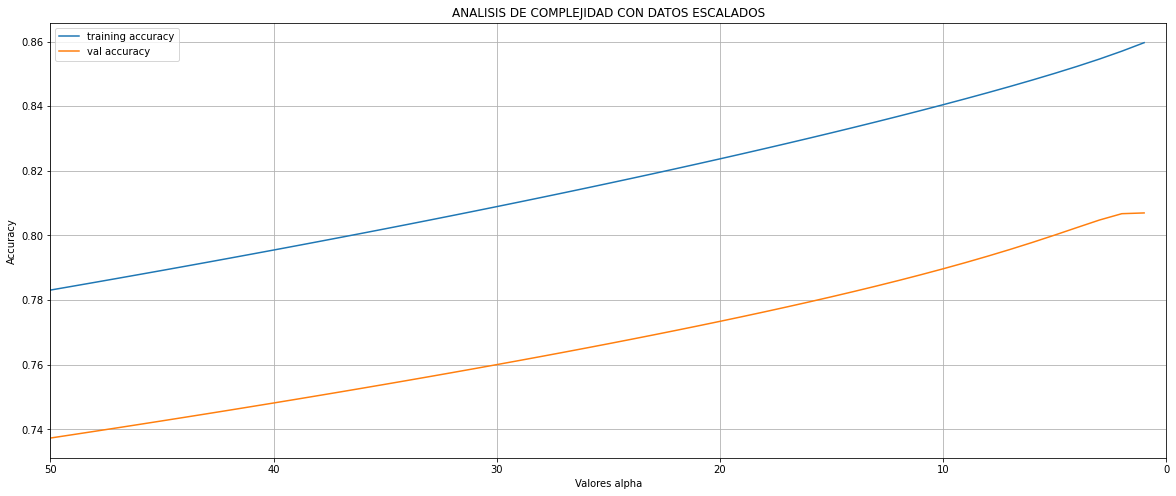

In [ ]:
training_accuracy2_scaled = []                    #Lista para guardar los datos de la precision con los datos de entrenamiento
val_accuracy2_scaled = []                         #Lista para guardar los datos de la precision con los datos de validacion

valor_alpha =range(50 , 0, -1)                     #Creamos un vector descendente que contiene va de alpha=50 a alpha=1

for i in valor_alpha:                                                      #Ciclo FOR para realizar el entrenamiento y validacion desde alpha=50 a alpha=1
    reg_ridge_scaled = Ridge(alpha=i)                                             #Creamos un objeto que contiene al modelo de regresion ridge
    reg_ridge_scaled.fit(x_train_scaled, y_train)                                        #Entrenamos el modelo con los datos de entrenamiento
    training_accuracy2_scaled.append(reg_ridge_scaled.score(x_train_scaled, y_train))           #Medimos y guardamos el desempeño del modelo con los datos de entrenamiento
    val_accuracy2_scaled.append(reg_ridge_scaled.score(x_val_scaled, y_val))                    #Medimos y guardamos el desempeño del modelo con los datos de validacion

# GRAFICAMOS LOS DESEMPEÑOS OBTENIDOS VS LOS VALORES DE ALPHA
plt.figure(figsize=(20, 8))
plt.plot(valor_alpha, training_accuracy2_scaled, label="training accuracy")
plt.plot(valor_alpha, val_accuracy2_scaled, label="val accuracy")
plt.title("ANALISIS DE COMPLEJIDAD CON DATOS ESCALADOS")
plt.ylabel("Accuracy")
plt.xlabel("Valores alpha")
plt.xlim(50, 0)
plt.grid()
plt.legend()

In [ ]:
#CON UN ALPHA = 1 EL DESEMPEÑO ES EL MEJOR EN VALIDACION
reg_ridge_scaled = Ridge(alpha=1) 
reg_ridge_scaled.fit(x_train_scaled, y_train)
print('Desempeño de entrenamiento: ', reg_ridge_scaled.score(x_train_scaled, y_train))
print('Desempeño de validacion: ', reg_ridge_scaled.score(x_val_scaled, y_val))

Desempeño de entrenamiento:  0.8596533274916348
Desempeño de validacion:  0.8069795534460039


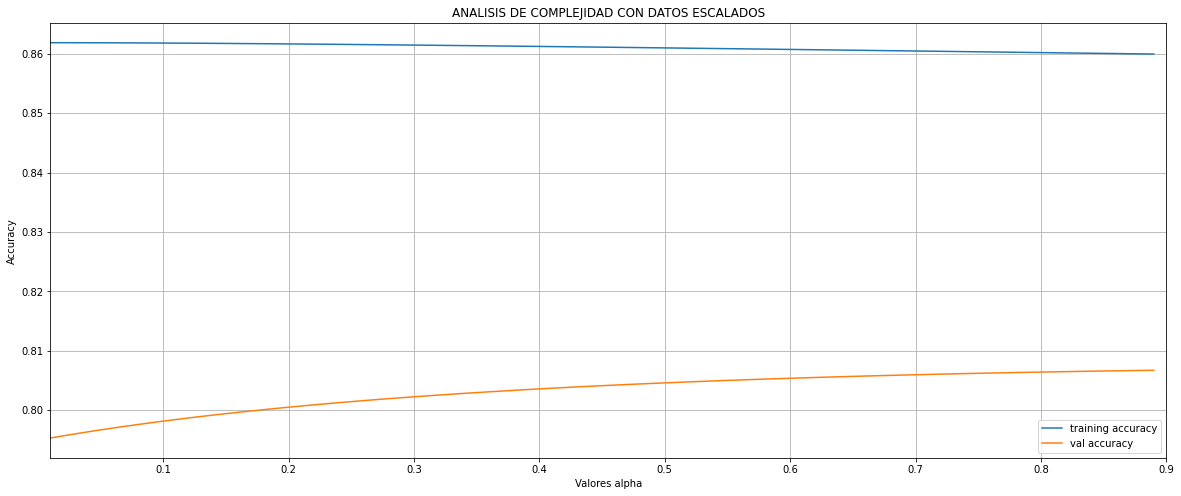

In [ ]:
training_accuracy3_scaled = []                    #Lista para guardar los datos de la precision con los datos de entrenamiento
val_accuracy3_scaled = []                         #Lista para guardar los datos de la precision con los datos de validacion

valor_alpha2 =np.arange(0.01, 0.9, 0.01)                    #Creamos un vector descendente que contiene va de K=100 a k=1

for i in valor_alpha2:                                                      #Ciclo FOR para realizar el entrenamiento y validacion desde K=50 hasta K=1
    reg_ridge_scaled = Ridge(alpha=i)                                           #Creamos un objeto que contiene al modelo de clasificacion KNN
    reg_ridge_scaled.fit(x_train_scaled, y_train)                                      #Entrenamos el modelo con los datos de entrenamiento
    training_accuracy3_scaled.append(reg_ridge_scaled.score(x_train_scaled, y_train))          #Medimos y guardamos el desempeño del modelo con los datos de entrenamiento
    val_accuracy3_scaled.append(reg_ridge_scaled.score(x_val_scaled, y_val))                   #Medimos y guardamos el desempeño del modelo con los datos de validacion

# GRAFICAMOS LOS DESEMPEÑOS OBTENIDOS VS LOS VALORES DE K
plt.figure(figsize=(20, 8))
plt.plot(valor_alpha2, training_accuracy3_scaled, label="training accuracy")
plt.plot(valor_alpha2, val_accuracy3_scaled, label="val accuracy")
plt.title("ANALISIS DE COMPLEJIDAD CON DATOS ESCALADOS")
plt.ylabel("Accuracy")
plt.xlabel("Valores alpha")
plt.xlim(0.01, 0.9)
plt.grid()
plt.legend()

In [ ]:
reg_ridge_scaled = Ridge(alpha=0.8).fit(x_train_scaled, y_train)

print('alpha: 0.1')
print('Desempeño de entrenamiento: ', reg_ridge_scaled.score(x_train_scaled, y_train))
print('Desempeño de validacion: ', reg_ridge_scaled.score(x_val_scaled, y_val))

alpha: 0.1
Desempeño de entrenamiento:  0.8601952169712284
Desempeño de validacion:  0.8064050235607138


**RESULTADO**

Como se observan en las graficas, el modelo Ridge que mejor demuestra un desempeño en validacion es el que posee un alpha = 1, con un desempeño de 86% en entrenamiento y un 80% en validacion.

Gana el modelo Ridge sin los datos escalados.


# **MODELO: LASSO**

In [ ]:
reg_lasso = Lasso(alpha=0.01, max_iter=1000000)
reg_lasso.fit(x_train, y_train)
print('Desempeño de entrenamiento: ', reg_lasso.score(x_train, y_train))
print('Desempeño de validacion: ', reg_lasso.score(x_val, y_val), '\n')

reg_lasso = Lasso(alpha=0.0001, max_iter=1000000)
reg_lasso.fit(x_train, y_train)
print('Desempeño de entrenamiento: ', reg_lasso.score(x_train, y_train))
print('Desempeño de validacion: ', reg_lasso.score(x_val, y_val))

Desempeño de entrenamiento:  0.8618656332664705
Desempeño de validacion:  0.7949281659778195 

Desempeño de entrenamiento:  0.8618656335063003
Desempeño de validacion:  0.794924370790705


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125833466685.85217, tolerance: 711570848.3106698
  positive)


**RESULTADO**

El modelo Lasso como se observa, presenta un desempeño de 86% en entrenamiento y un desempeño de 79% en validacion. Se presenta un poco de sobreentrenamiento.

In [ ]:
reg_lasso_scaled = Lasso(alpha=0.01, max_iter=1000000)
reg_lasso_scaled.fit(x_train_scaled, y_train)
print('Desempeño de entrenamiento: ', reg_lasso_scaled.score(x_train_scaled, y_train))
print('Desempeño de validacion: ', reg_lasso_scaled.score(x_val_scaled, y_val), '\n')

reg_lasso_scaled = Lasso(alpha=0.0001, max_iter=1000000)
reg_lasso_scaled.fit(x_train_scaled, y_train)
print('Desempeño de entrenamiento: ', reg_lasso_scaled.score(x_train_scaled, y_train))
print('Desempeño de validacion: ', reg_lasso_scaled.score(x_val_scaled, y_val))

Desempeño de entrenamiento:  0.8618656331840613
Desempeño de validacion:  0.7949304592517518 

Desempeño de entrenamiento:  0.8618656335062915
Desempeño de validacion:  0.7949243937111254


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125833528584.7528, tolerance: 711570848.3106698
  positive)


**RESULTADO**

El modelo Lasso como se observa, presenta un desempeño de 86% en entrenamiento y un desempeño de 79% en validacion. Se presenta un poco de sobreentrenamiento.

# **MODELO: DECISION TREE REGRESOR**

**DATOS SIN ESCALAR**

In [ ]:
reg_tree = DecisionTreeRegressor()
reg_tree.fit(x_train, y_train)
print('Desempeño de entrenamiento: ', reg_tree.score(x_train, y_train))
print('Desempeño de validacion: ', reg_tree.score(x_val, y_val))

Desempeño de entrenamiento:  0.9999951593014129
Desempeño de validacion:  0.8162491227935351


**RESULTADO**

Se observa que el modelo de regresion de arbol de decision da un mejor resultado que el modelo de regresion de KNN y que de regresion lineal, con un desempeño de 99% en entrenamiento y un desempeño de 82% en validacion. Pero se presenta sobreentrenamiento en el modelo (overfitting).

**DATOS ESCALADOS**

In [ ]:
reg_tree_scaled = DecisionTreeRegressor()
reg_tree_scaled.fit(x_train_scaled, y_train)
print('Desempeño de entrenamiento: ', reg_tree_scaled.score(x_train_scaled, y_train))
print('Desempeño de validacion: ', reg_tree_scaled.score(x_val_scaled, y_val))

Desempeño de entrenamiento:  0.9999951593014129
Desempeño de validacion:  0.8353273144028668


**RESULTADO**

Se observa que el modelo de regresion de arbol de decision da un mejor resultado con datos escalados que el modelo de regresion de KNN y que de regresion lineal, con un desempeño de 99% en entrenamiento y un desempeño de 83% en validacion. Pero se presenta sobreentrenamiento en el modelo (overfitting).

# **DATASET DE TEST**

80 ENTRADAS - CARACTERISTICAS

1459 datos

In [ ]:
test_data = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
#DATOS DE ENTRADA - FEATURES
features_test = test_data.loc[:, ['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea', 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','Street','LotShape','LandContour','LotConfig','LandSlope',   'Neighborhood','Condition1','BldgType','RoofStyle','ExterQual','ExterCond','Foundation','HeatingQC','CentralAir','PavedDrive','SaleCondition']]
print('Features: ', features_test.shape)

Features:  (1459, 41)


In [ ]:
print('original','\n', list(features_test),'\n')
features_dummies_test = pd.get_dummies(features_test)
print('con dummies', '\n', list(features_dummies_test), '\n')

print('Features: ', features_test.shape)
print('Features dummies: ', features_dummies_test.shape)

original 
 ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'HeatingQC', 'CentralAir', 'PavedDrive', 'SaleCondition'] 

con dummies 
 ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3

In [ ]:
features_dummies_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,11622,5,6,1961,1961,896,0,0,896,...,1,0,0,1,0,0,0,0,1,0
1,20,14267,6,6,1958,1958,1329,0,0,1329,...,1,0,0,1,0,0,0,0,1,0
2,60,13830,5,5,1997,1998,928,701,0,1629,...,1,0,0,1,0,0,0,0,1,0
3,60,9978,6,6,1998,1998,926,678,0,1604,...,1,0,0,1,0,0,0,0,1,0
4,120,5005,8,5,1992,1992,1280,0,0,1280,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
features_dummies_test.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,9819.161069,6.078821,5.553804,1971.357779,1983.662783,1156.534613,325.967786,3.543523,1486.045922,...,0.930775,0.086361,0.021933,0.891707,0.061001,0.005483,0.008225,0.017820,0.825223,0.082248
std,42.746880,4955.517327,1.436812,1.113740,30.390071,21.130467,398.165820,420.610226,44.043251,485.566099,...,0.253924,0.280992,0.146514,0.310857,0.239414,0.073871,0.090348,0.132344,0.379907,0.274837
min,20.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,407.000000,0.000000,0.000000,407.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,873.500000,0.000000,0.000000,1117.500000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,1079.000000,0.000000,0.000000,1432.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,1382.500000,676.000000,0.000000,1721.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,1862.000000,1064.000000,5095.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#ESCALAMOS LOS DATOS DE TEST
x_test_scaled = scaler.transform(features_dummies_test)

print(x_test_scaled.min(axis=0))
print(x_test_scaled.max(axis=0))

[ 0.          0.0007946   0.         -0.14285714  0.05072464  0.
  0.0167508   0.          0.          0.01375283  0.          0.
  0.          0.          0.08333333  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         

**USAREMOS EL MODELO DE REGRESION DE ARBOL DE DECISION QUE PRESENTO UN MEJOR DESEMPEÑO**

In [ ]:
y_pred=reg_tree_scaled.predict(x_test_scaled)
print(y_pred.shape)

(1459,)


# Generamos el archivo con las predicciones para subir a kaggle

In [ ]:
output = pd.DataFrame({'Id': test_data["Id"],
                       'SalePrice': y_pred})
output.to_csv('submission.csv', index=False)